In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
laps_2018 = pd.read_csv('../data/merged/laps_2018.csv')

In [3]:
laps_2018.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:08:37.840000,VET,5,0 days 00:01:40.809000,1.0,NaN,NaN,NaN,NaN,0 days 00:00:28.184000,...,True,Ferrari,0 days 00:06:56.859000,2018-06-10 18:12:56.924,24.0,1.0,False,NaN,False,False
1,0 days 00:10:49.458000,VET,5,0 days 00:02:11.618000,2.0,NaN,NaN,NaN,0 days 00:00:34.873000,0 days 00:00:49.848000,...,True,Ferrari,0 days 00:08:37.840000,2018-06-10 18:14:37.905,4.0,1.0,False,NaN,False,False
2,0 days 00:12:54.262000,VET,5,0 days 00:02:04.804000,3.0,1.0,NaN,NaN,0 days 00:00:36.480000,0 days 00:00:42.161000,...,False,Ferrari,0 days 00:10:49.458000,2018-06-10 18:16:49.523,4.0,1.0,False,NaN,False,False
3,0 days 00:15:00.468000,VET,5,0 days 00:02:06.206000,4.0,1.0,NaN,NaN,0 days 00:00:34.541000,0 days 00:00:39.136000,...,False,Ferrari,0 days 00:12:54.262000,2018-06-10 18:18:54.327,41.0,1.0,False,NaN,False,False
4,0 days 00:16:17.413000,VET,5,0 days 00:01:16.945000,5.0,1.0,NaN,NaN,0 days 00:00:21.333000,0 days 00:00:24.651000,...,False,Ferrari,0 days 00:15:00.468000,2018-06-10 18:21:00.533,1.0,1.0,False,NaN,False,True


In [4]:
laps_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22336 entries, 0 to 22335
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                22336 non-null  object 
 1   Driver              22336 non-null  object 
 2   DriverNumber        22336 non-null  int64  
 3   LapTime             21896 non-null  object 
 4   LapNumber           22336 non-null  float64
 5   Stint               21993 non-null  float64
 6   PitOutTime          539 non-null    object 
 7   PitInTime           566 non-null    object 
 8   Sector1Time         21857 non-null  object 
 9   Sector2Time         22259 non-null  object 
 10  Sector3Time         22257 non-null  object 
 11  Sector1SessionTime  21800 non-null  object 
 12  Sector2SessionTime  22259 non-null  object 
 13  Sector3SessionTime  22257 non-null  object 
 14  SpeedI1             19449 non-null  float64
 15  SpeedI2             22253 non-null  float64
 16  Spee

In [5]:
laps_2018.isnull().sum()

Time                      0
Driver                    0
DriverNumber              0
LapTime                 440
LapNumber                 0
Stint                   343
PitOutTime            21797
PitInTime             21770
Sector1Time             479
Sector2Time              77
Sector3Time              79
Sector1SessionTime      536
Sector2SessionTime       77
Sector3SessionTime       79
SpeedI1                2887
SpeedI2                  83
SpeedFL                 639
SpeedST                1696
IsPersonalBest           36
Compound                343
TyreLife                343
FreshTyre                 0
Team                      0
LapStartTime              0
LapStartDate           1028
TrackStatus            1317
Position                 52
Deleted                   0
DeletedReason         22336
FastF1Generated           0
IsAccurate                0
dtype: int64

In [9]:
valid_laps = laps_2018.dropna(subset=['LapTime']).copy()

In [10]:
valid_laps['LapTimeInSeconds'] = pd.to_timedelta(valid_laps['LapTime']).dt.total_seconds()

In [23]:
fastest_laps = valid_laps.groupby("Driver")['LapTimeInSeconds'].min().sort_values()

In [24]:
fastest_laps.head()

Driver
RAI    66.957
VET    67.082
HAM    67.241
VER    67.442
RIC    67.591
Name: LapTimeInSeconds, dtype: float64

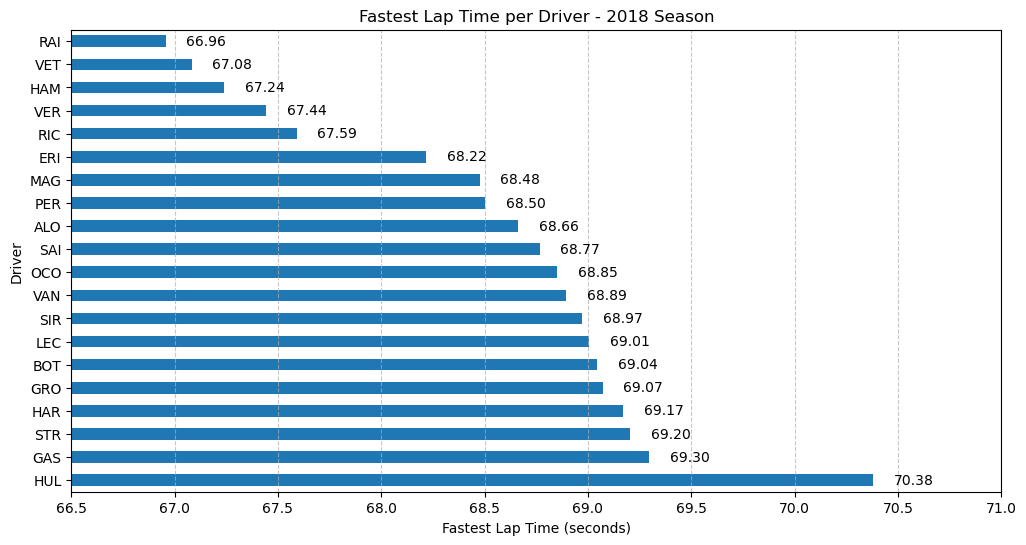

In [34]:


plt.figure(figsize=(12, 6))  # Width = 12 inches, Height = 6 inches
fastest_laps.plot(kind='barh')  # Horizontal bar chart
plt.xlabel("Fastest Lap Time (seconds)")
plt.title("Fastest Lap Time per Driver - 2018 Season")
plt.gca().invert_yaxis()  # So fastest is at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(fastest_laps.values):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center')
plt.xlim(66.5,71)# Light gridlines
plt.show()


In [35]:
driver_code = 'VER'
ver_laps = valid_laps[valid_laps['Driver']==driver_code]

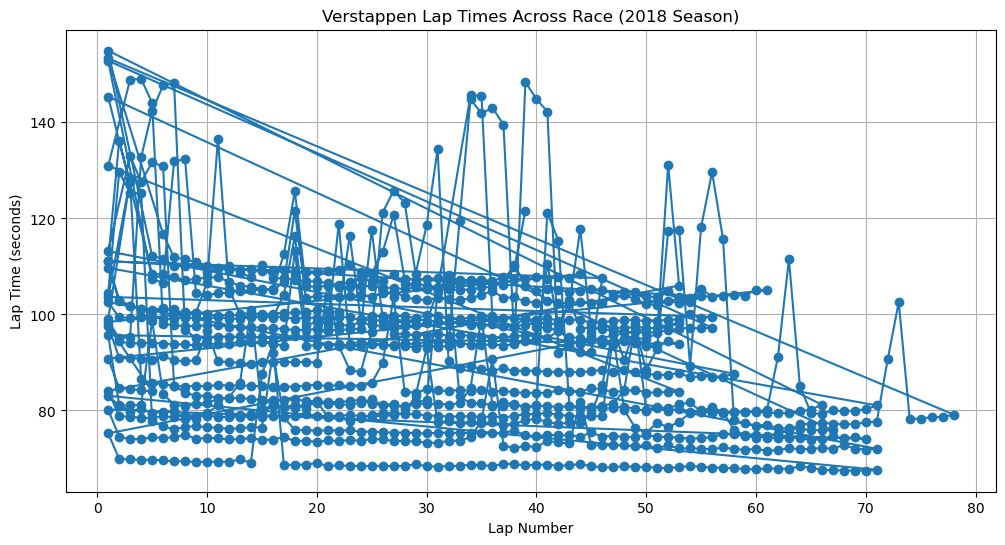

In [39]:
plt.figure(figsize=(12,6))
plt.plot(ver_laps["LapNumber"], ver_laps["LapTimeInSeconds"], marker='o')
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.title("Verstappen Lap Times Across Race (2018 Season)")
plt.grid(True)
plt.show()

In [40]:
laps_2018.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [42]:
ver_laps = ver_laps.dropna(subset=["Compound", "LapTimeInSeconds"])

In [45]:
compound_pace = ver_laps.groupby("Compound")['LapTimeInSeconds'].mean().sort_values()

In [46]:
compound_pace

Compound
MEDIUM          87.789694
ULTRASOFT       88.396130
SOFT            91.323366
SUPERSOFT       91.422199
HYPERSOFT       92.104452
INTERMEDIATE    93.317750
Name: LapTimeInSeconds, dtype: float64

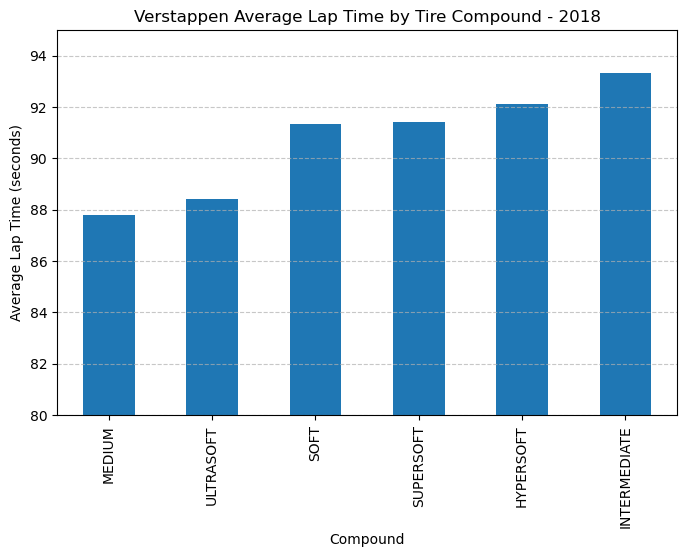

In [49]:
plt.figure(figsize=(8,5))
compound_pace.plot(kind='bar')
plt.ylabel("Average Lap Time (seconds)")
plt.title("Verstappen Average Lap Time by Tire Compound - 2018")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(80,95)
plt.show()

In [52]:
pitstop_laps = ver_laps[(ver_laps["PitInTime"].notnull()) | (ver_laps["PitOutTime"].notnull())]

In [53]:
# In-Laps: Laps where Verstappen entered the pits
in_laps = ver_laps[ver_laps["PitInTime"].notnull()]

# Out-Laps: Laps where Verstappen exited the pits
out_laps = ver_laps[ver_laps["PitOutTime"].notnull()]


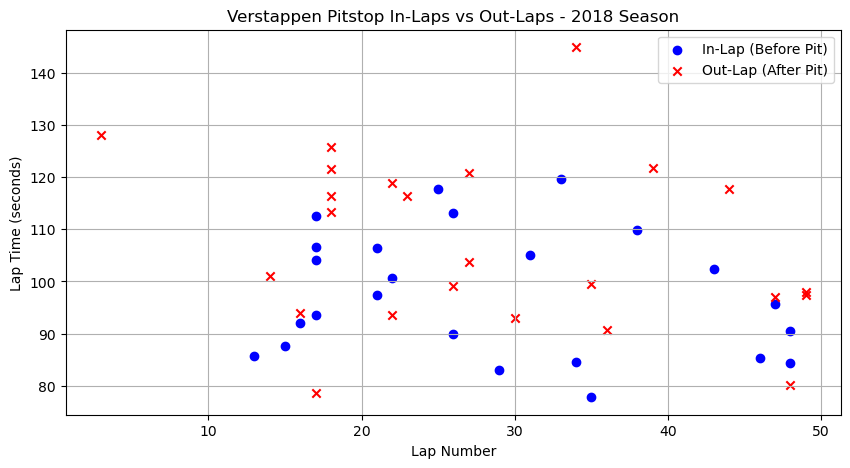

In [55]:
import matplotlib.pyplot as plt

# Compare In-Lap vs Out-Lap Lap Times
plt.figure(figsize=(10,5))

plt.scatter(in_laps["LapNumber"], in_laps["LapTimeInSeconds"], color='blue', label='In-Lap (Before Pit)', marker='o')
plt.scatter(out_laps["LapNumber"], out_laps["LapTimeInSeconds"], color='red', label='Out-Lap (After Pit)', marker='x')

plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.title("Verstappen Pitstop In-Laps vs Out-Laps - 2018 Season")
plt.legend()
plt.grid(True)
plt.show()


In [56]:
results_2018 = pd.read_csv('../data/merged/results_2018.csv')

In [57]:
results_2018.head()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
0,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,NaN,1.0,1,1.0,NaN,NaN,NaN,0 days 01:37:16.427000,Finished,25.0
1,5,S VETTEL,VET,vettel,Ferrari,DC0000,ferrari,Sebastian,Vettel,Sebastian Vettel,...,NaN,2.0,2,4.0,NaN,NaN,NaN,0 days 00:00:17.123000,Finished,18.0
2,7,K RAIKKONEN,RAI,raikkonen,Ferrari,DC0000,ferrari,Kimi,Räikkönen,Kimi Räikkönen,...,NaN,3.0,3,3.0,NaN,NaN,NaN,0 days 00:00:20.101000,Finished,15.0
3,3,D RICCIARDO,RIC,ricciardo,Red Bull Racing,1E41FF,red_bull,Daniel,Ricciardo,Daniel Ricciardo,...,NaN,4.0,4,12.0,NaN,NaN,NaN,0 days 00:00:46.419000,Finished,12.0
4,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,NaN,5.0,5,2.0,NaN,NaN,NaN,0 days 00:00:50,Finished,10.0


In [58]:
results_2018.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [59]:
results_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DriverNumber        420 non-null    int64  
 1   BroadcastName       420 non-null    object 
 2   Abbreviation        420 non-null    object 
 3   DriverId            420 non-null    object 
 4   TeamName            420 non-null    object 
 5   TeamColor           420 non-null    object 
 6   TeamId              420 non-null    object 
 7   FirstName           420 non-null    object 
 8   LastName            420 non-null    object 
 9   FullName            420 non-null    object 
 10  HeadshotUrl         0 non-null      float64
 11  CountryCode         0 non-null      float64
 12  Position            420 non-null    float64
 13  ClassifiedPosition  420 non-null    object 
 14  GridPosition        420 non-null    float64
 15  Q1                  0 non-null      float64
 16  Q2      

In [60]:
results_2018['CountryCode']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
415   NaN
416   NaN
417   NaN
418   NaN
419   NaN
Name: CountryCode, Length: 420, dtype: float64

In [63]:
qualifying_2018 = pd.read_csv('../data/merged/qualifying_2018.csv')

In [64]:
qualifying_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DriverNumber        400 non-null    int64  
 1   BroadcastName       400 non-null    object 
 2   Abbreviation        400 non-null    object 
 3   DriverId            400 non-null    object 
 4   TeamName            400 non-null    object 
 5   TeamColor           400 non-null    object 
 6   TeamId              400 non-null    object 
 7   FirstName           400 non-null    object 
 8   LastName            400 non-null    object 
 9   FullName            400 non-null    object 
 10  HeadshotUrl         0 non-null      float64
 11  CountryCode         0 non-null      float64
 12  Position            400 non-null    float64
 13  ClassifiedPosition  0 non-null      float64
 14  GridPosition        0 non-null      float64
 15  Q1                  394 non-null    object 
 16  Q2      

In [66]:
qualifying_2018

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
0,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,NaN,1.0,NaN,NaN,0 days 00:01:28.702000,0 days 00:01:28.017000,0 days 00:01:27.760000,NaN,NaN,NaN
1,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,NaN,2.0,NaN,NaN,0 days 00:01:29.297000,0 days 00:01:27.987000,0 days 00:01:28.059000,NaN,NaN,NaN
2,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,1E41FF,red_bull,Max,Verstappen,Max Verstappen,...,NaN,3.0,NaN,NaN,0 days 00:01:29.480000,0 days 00:01:28.849000,0 days 00:01:29.057000,NaN,NaN,NaN
3,7,K RAIKKONEN,RAI,raikkonen,Ferrari,DC0000,ferrari,Kimi,Räikkönen,Kimi Räikkönen,...,NaN,4.0,NaN,NaN,0 days 00:01:29.631000,0 days 00:01:28.595000,0 days 00:01:29.521000,NaN,NaN,NaN
4,8,R GROSJEAN,GRO,grosjean,Haas F1 Team,828282,haas,Romain,Grosjean,Romain Grosjean,...,NaN,5.0,NaN,NaN,0 days 00:01:29.724000,0 days 00:01:29.678000,0 days 00:01:29.761000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,11,S PEREZ,PER,perez,Racing Point,f596c8,force_india,Sergio,Perez,Sergio Perez,...,NaN,16.0,NaN,NaN,0 days 00:01:21.888000,NaN,NaN,NaN,NaN,NaN
396,16,C LECLERC,LEC,leclerc,Sauber,9B0000,sauber,Charles,Leclerc,Charles Leclerc,...,NaN,17.0,NaN,NaN,0 days 00:01:21.889000,NaN,NaN,NaN,NaN,NaN
397,28,B HARTLEY,HAR,brendon_hartley,Toro Rosso,469BFF,toro_rosso,Brendon,Hartley,Brendon Hartley,...,NaN,18.0,NaN,NaN,0 days 00:01:21.934000,NaN,NaN,NaN,NaN,NaN
398,9,M ERICSSON,ERI,ericsson,Sauber,9B0000,sauber,Marcus,Ericsson,Marcus Ericsson,...,NaN,19.0,NaN,NaN,0 days 00:01:22.048000,NaN,NaN,NaN,NaN,NaN


In [67]:
quali_2025 = pd.read_csv('../data/merged/qualifying_2025.csv')

In [68]:
quali_2025

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
0,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,NaN,1.0,NaN,NaN,0 days 00:01:31.392000,0 days 00:01:30.454000,0 days 00:01:29.841000,NaN,NaN,NaN
1,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,NaN,2.0,NaN,NaN,0 days 00:01:31.494000,0 days 00:01:30.664000,0 days 00:01:30.009000,NaN,NaN,NaN
2,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,NaN,3.0,NaN,NaN,0 days 00:01:31.454000,0 days 00:01:30.724000,0 days 00:01:30.175000,NaN,NaN,NaN
3,12,K ANTONELLI,ANT,antonelli,Mercedes,27F4D2,mercedes,Kimi,Antonelli,Kimi Antonelli,...,NaN,4.0,NaN,NaN,0 days 00:01:31.415000,0 days 00:01:30.716000,0 days 00:01:30.213000,NaN,NaN,NaN
4,10,P GASLY,GAS,gasly,Alpine,0093CC,alpine,Pierre,Gasly,Pierre Gasly,...,NaN,5.0,NaN,NaN,0 days 00:01:31.462000,0 days 00:01:30.643000,0 days 00:01:30.216000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18,L STROLL,STR,stroll,Aston Martin,229971,aston_martin,Lance,Stroll,Lance Stroll,...,NaN,16.0,NaN,NaN,0 days 00:01:28.645000,NaN,NaN,NaN,NaN,NaN
96,7,J DOOHAN,DOO,doohan,Alpine,0093CC,alpine,Jack,Doohan,Jack Doohan,...,NaN,17.0,NaN,NaN,0 days 00:01:28.739000,NaN,NaN,NaN,NaN,NaN
97,27,N HULKENBERG,HUL,hulkenberg,Kick Sauber,52E252,sauber,Nico,Hulkenberg,Nico Hulkenberg,...,NaN,18.0,NaN,NaN,0 days 00:01:28.782000,NaN,NaN,NaN,NaN,NaN
98,31,E OCON,OCO,ocon,Haas F1 Team,B6BABD,haas,Esteban,Ocon,Esteban Ocon,...,NaN,19.0,NaN,NaN,0 days 00:01:29.092000,NaN,NaN,NaN,NaN,NaN


In [69]:
results_2025 = pd.read_csv('../data/merged/results_2025.csv')

In [74]:
results_2025.head(20)

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
0,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NaN,1.0,1,1.0,NaN,NaN,NaN,0 days 01:22:06.983000,Finished,25.0
1,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,NaN,2.0,2,2.0,NaN,NaN,NaN,0 days 00:00:01.423000,Finished,18.0
2,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,NaN,3.0,3,3.0,NaN,NaN,NaN,0 days 00:00:02.129000,Finished,15.0
3,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,NaN,4.0,4,4.0,NaN,NaN,NaN,0 days 00:00:16.097000,Finished,12.0
4,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,NaN,5.0,5,5.0,NaN,NaN,NaN,0 days 00:00:17.362000,Finished,10.0
5,12,K ANTONELLI,ANT,antonelli,Mercedes,27F4D2,mercedes,Kimi,Antonelli,Kimi Antonelli,...,NaN,6.0,6,6.0,NaN,NaN,NaN,0 days 00:00:18.671000,Finished,8.0
6,44,L HAMILTON,HAM,hamilton,Ferrari,E80020,ferrari,Lewis,Hamilton,Lewis Hamilton,...,NaN,7.0,7,8.0,NaN,NaN,NaN,0 days 00:00:29.182000,Finished,6.0
7,6,I HADJAR,HAD,hadjar,Racing Bulls,6692FF,rb,Isack,Hadjar,Isack Hadjar,...,NaN,8.0,8,7.0,NaN,NaN,NaN,0 days 00:00:37.134000,Finished,4.0
8,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,NaN,9.0,9,9.0,NaN,NaN,NaN,0 days 00:00:40.367000,Finished,2.0
9,87,O BEARMAN,BEA,bearman,Haas F1 Team,B6BABD,haas,Oliver,Bearman,Oliver Bearman,...,NaN,10.0,10,10.0,NaN,NaN,NaN,0 days 00:00:54.529000,Finished,1.0


In [71]:
results_2018.head()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
0,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,NaN,1.0,1,1.0,NaN,NaN,NaN,0 days 01:37:16.427000,Finished,25.0
1,5,S VETTEL,VET,vettel,Ferrari,DC0000,ferrari,Sebastian,Vettel,Sebastian Vettel,...,NaN,2.0,2,4.0,NaN,NaN,NaN,0 days 00:00:17.123000,Finished,18.0
2,7,K RAIKKONEN,RAI,raikkonen,Ferrari,DC0000,ferrari,Kimi,Räikkönen,Kimi Räikkönen,...,NaN,3.0,3,3.0,NaN,NaN,NaN,0 days 00:00:20.101000,Finished,15.0
3,3,D RICCIARDO,RIC,ricciardo,Red Bull Racing,1E41FF,red_bull,Daniel,Ricciardo,Daniel Ricciardo,...,NaN,4.0,4,12.0,NaN,NaN,NaN,0 days 00:00:46.419000,Finished,12.0
4,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,NaN,5.0,5,2.0,NaN,NaN,NaN,0 days 00:00:50,Finished,10.0


In [72]:
qualifying_2018.head()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
0,44,L HAMILTON,HAM,hamilton,Mercedes,00D2BE,mercedes,Lewis,Hamilton,Lewis Hamilton,...,NaN,1.0,NaN,NaN,0 days 00:01:28.702000,0 days 00:01:28.017000,0 days 00:01:27.760000,NaN,NaN,NaN
1,77,V BOTTAS,BOT,bottas,Mercedes,00D2BE,mercedes,Valtteri,Bottas,Valtteri Bottas,...,NaN,2.0,NaN,NaN,0 days 00:01:29.297000,0 days 00:01:27.987000,0 days 00:01:28.059000,NaN,NaN,NaN
2,33,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,1E41FF,red_bull,Max,Verstappen,Max Verstappen,...,NaN,3.0,NaN,NaN,0 days 00:01:29.480000,0 days 00:01:28.849000,0 days 00:01:29.057000,NaN,NaN,NaN
3,7,K RAIKKONEN,RAI,raikkonen,Ferrari,DC0000,ferrari,Kimi,Räikkönen,Kimi Räikkönen,...,NaN,4.0,NaN,NaN,0 days 00:01:29.631000,0 days 00:01:28.595000,0 days 00:01:29.521000,NaN,NaN,NaN
4,8,R GROSJEAN,GRO,grosjean,Haas F1 Team,828282,haas,Romain,Grosjean,Romain Grosjean,...,NaN,5.0,NaN,NaN,0 days 00:01:29.724000,0 days 00:01:29.678000,0 days 00:01:29.761000,NaN,NaN,NaN


In [75]:
quali_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DriverNumber        100 non-null    int64  
 1   BroadcastName       100 non-null    object 
 2   Abbreviation        100 non-null    object 
 3   DriverId            100 non-null    object 
 4   TeamName            100 non-null    object 
 5   TeamColor           100 non-null    object 
 6   TeamId              100 non-null    object 
 7   FirstName           100 non-null    object 
 8   LastName            100 non-null    object 
 9   FullName            100 non-null    object 
 10  HeadshotUrl         100 non-null    object 
 11  CountryCode         0 non-null      float64
 12  Position            100 non-null    float64
 13  ClassifiedPosition  0 non-null      float64
 14  GridPosition        0 non-null      float64
 15  Q1                  99 non-null     object 
 16  Q2       

In [78]:
r21 = pd.read_csv('../data/merged/results_2021.csv')

In [79]:
r21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DriverNumber        460 non-null    int64  
 1   BroadcastName       459 non-null    object 
 2   Abbreviation        460 non-null    object 
 3   DriverId            460 non-null    object 
 4   TeamName            460 non-null    object 
 5   TeamColor           459 non-null    object 
 6   TeamId              460 non-null    object 
 7   FirstName           460 non-null    object 
 8   LastName            460 non-null    object 
 9   FullName            460 non-null    object 
 10  HeadshotUrl         457 non-null    object 
 11  CountryCode         0 non-null      float64
 12  Position            459 non-null    float64
 13  ClassifiedPosition  460 non-null    object 
 14  GridPosition        459 non-null    float64
 15  Q1                  0 non-null      float64
 16  Q2      

In [80]:
qualifiying_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DriverNumber        400 non-null    int64  
 1   BroadcastName       400 non-null    object 
 2   Abbreviation        400 non-null    object 
 3   DriverId            400 non-null    object 
 4   TeamName            400 non-null    object 
 5   TeamColor           400 non-null    object 
 6   TeamId              400 non-null    object 
 7   FirstName           400 non-null    object 
 8   LastName            400 non-null    object 
 9   FullName            400 non-null    object 
 10  HeadshotUrl         0 non-null      float64
 11  CountryCode         0 non-null      float64
 12  Position            400 non-null    float64
 13  ClassifiedPosition  0 non-null      float64
 14  GridPosition        0 non-null      float64
 15  Q1                  394 non-null    object 
 16  Q2      

In [81]:
results_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DriverNumber        420 non-null    int64  
 1   BroadcastName       420 non-null    object 
 2   Abbreviation        420 non-null    object 
 3   DriverId            420 non-null    object 
 4   TeamName            420 non-null    object 
 5   TeamColor           420 non-null    object 
 6   TeamId              420 non-null    object 
 7   FirstName           420 non-null    object 
 8   LastName            420 non-null    object 
 9   FullName            420 non-null    object 
 10  HeadshotUrl         0 non-null      float64
 11  CountryCode         0 non-null      float64
 12  Position            420 non-null    float64
 13  ClassifiedPosition  420 non-null    object 
 14  GridPosition        420 non-null    float64
 15  Q1                  0 non-null      float64
 16  Q2      